In [1]:
# numerical module
import numpy as np

#setup plotting 
import matplotlib.pyplot as plt
plt.style.use('../../matplotlib/SciencePlots-APS.mplstyle')

In [2]:
# module for plot bandstructures
def read_band(fname, EFermi):
    band_pw = np.loadtxt(fname)
    EF = EFermi
    kDist = np.unique(band_pw[:, 0])
    BandsPW = (np.reshape(band_pw[:, 1], (-1, len(kDist))).T) - EF
    return kDist, BandsPW

def bandgap(kDist, BandsPW, NumOccupied):
    bands = BandsPW
    VBM, CBM = max(bands[:, NumOccupied]), min(bands[:, NumOccupied+1])
    kVBM = kDist[np.where(bands[:, NumOccupied] == VBM)][0]
    kCBM = kDist[np.where(bands[:, NumOccupied+1] == CBM)][0]
    gap = CBM - VBM
    BandGapData = np.array([kVBM, kCBM, VBM, CBM, gap])
    #print('| k-VBM | k-CBM | VBM (eV) | CBM (eV) | Egap (eV) |')
    #print('| {:.3f} | {:.3f} | {:.3f}    | {:.3f}    | {:.3f}     |'.format(*BandGapData))
    #print('=> Direct Gap' if kVBM == kCBM else '=> Indirect Gap')
    return BandGapData

## III-V group

In [3]:
# Fermi level for each material
EFGaAs = 5.33091          # [eV]
EFGaSb = 4.96225          # [eV]
EFInAs = 4.20774          # [eV]
EFInP = 4.40716           # [eV]

### GaAs

In [4]:
# read band GaAs
kDistGaAs, BandGaAs = read_band('../III-V/GaAs/bands/GaAs.bands.gnu', EFGaAs)
# high-symmetry point from prefix.band.out
kNodeGaAs = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])
# labels of nodes from prefix.nscfband.in
labelGaAs = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')
# Number of occupied states (from *.nscf.out)
NumOccupiedGaAs = 3            # 4th band

### GaSb

In [5]:
# read band GaAs
kDistGaSb, BandGaSb = read_band('../III-V/GaSb/bands/GaSb.bands.gnu', EFGaSb)
# high-symmetry point from prefix.band.out
kNodeGaSb = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])
# labels of nodes from prefix.nscfband.in
labelGaSb = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')
# Number of occupied states (from *.nscf.out)
NumOccupiedGaSb = 3            # 4th band

### InAs

In [6]:
# read band GaAs
kDistInAs, BandInAs = read_band('../III-V/InAs/bands/InAs.bands.gnu', EFInAs)
# high-symmetry point from prefix.band.out
kNodeInAs = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])
# labels of nodes from prefix.nscfband.in
labelInAs = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')
# Number of occupied states (from *.nscf.out)
NumOccupiedInAs = 3            # 4th band

### InP

In [7]:
# read band GaAs
kDistInP, BandInP = read_band('../III-V/InP/bands/InP.bands.gnu', EFInP)
# high-symmetry point from prefix.band.out
kNodeInP = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])
# labels of nodes from prefix.nscfband.in
labelInP = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')
# Number of occupied states (from *.nscf.out)
NumOccupiedInP = 3            # 4th band

### Plot bandstructure III-V group

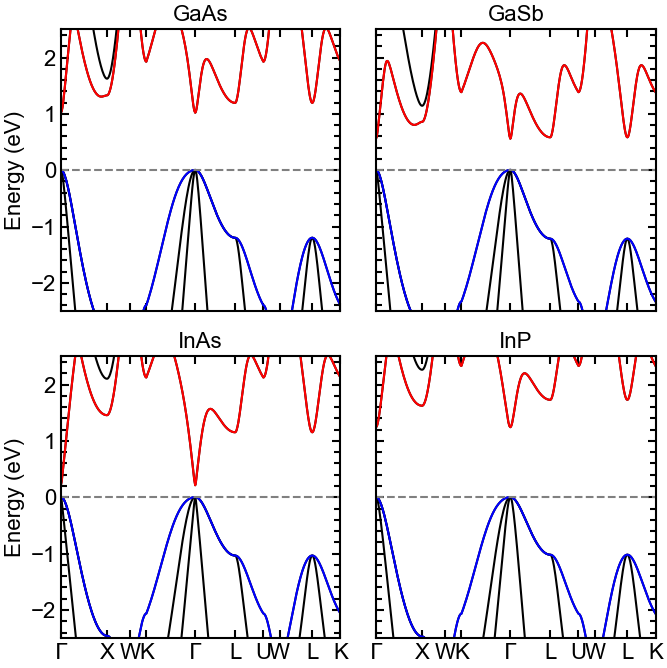

In [8]:
# set up figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,7), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# ----------------------------------#
# plot GaAs
# ----------------------------------#
for i in range(0, BandGaAs.shape[1]):
    axes[0,0].plot(kDistGaAs, BandGaAs[:, i], color='black')
axes[0,0].plot(kDistGaAs, BandGaAs[:, NumOccupiedGaAs], color='blue', lw=1.5)
axes[0,0].plot(kDistGaAs, BandGaAs[:, NumOccupiedGaAs+1], color='red', lw=1.5)
# Fermi level
axes[0,0].axhline(0, color='gray', ls='--', lw=1.5)
# X-Axis
axes[0,0].set_xlim(kNodeGaAs[0], kNodeGaAs[-1])
axes[0,0].set_xticks(kNodeGaAs)
axes[0,0].set_xticklabels(labelGaAs)
axes[0,0].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-Axis
axes[0,0].set_ylim(-2.5, 2.5)
axes[0,0].set_ylabel('Energy (eV)')
axes[0,0].set_title(r'GaAs', fontsize=16)

# ----------------------------------#
# plot GaSb
# ----------------------------------#
for i in range(0, BandGaSb.shape[1]):
    axes[0,1].plot(kDistGaSb, BandGaSb[:, i], color='black')
axes[0,1].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb], color='blue', lw=1.5)
axes[0,1].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb+1], color='red', lw=1.5)
# Fermi level
axes[0,1].axhline(0, color='gray', ls='--', lw=1.5)
# X-Axis
axes[0,1].set_xlim(kNodeGaSb[0], kNodeGaSb[-1])
axes[0,1].set_xticks(kNodeGaSb)
axes[0,1].set_xticklabels(labelGaSb)
axes[0,1].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-Axis
axes[0,1].set_ylim(-2.5, 2.5)
axes[0,1].set_title(r'GaSb', fontsize=16)

# ----------------------------------#
# plot InAs
# ----------------------------------#
for i in range(0, BandInAs.shape[1]):
    axes[1,0].plot(kDistInAs, BandInAs[:, i], color='black')
axes[1,0].plot(kDistInAs, BandInAs[:, NumOccupiedInAs], color='blue', lw=1.5)
axes[1,0].plot(kDistInAs, BandInAs[:, NumOccupiedInAs+1], color='red', lw=1.5)
# Fermi level
axes[1,0].axhline(0, color='gray', ls='--', lw=1.5)
# X-Axis
axes[1,0].set_xlim(kNodeInAs[0], kNodeInAs[-1])
axes[1,0].set_xticks(kNodeInAs)
axes[1,0].set_xticklabels(labelInAs)
axes[1,0].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-Axis
axes[1,0].set_ylim(-2.5, 2.5)
axes[1,0].set_ylabel('Energy (eV)')
axes[1,0].set_title(r'InAs', fontsize=16)

# ----------------------------------#
# plot InP
# ----------------------------------#
ax = axes[1,1]
for i in range(0, BandInP.shape[1]):
    axes[1,1].plot(kDistInP, BandInP[:, i], color='black')
axes[1,1].plot(kDistInP, BandInP[:, NumOccupiedInP], color='blue', lw=1.5)
axes[1,1].plot(kDistInP, BandInP[:, NumOccupiedInP+1], color='red', lw=1.5)
# Fermi level
axes[1,1].axhline(0, color='gray', ls='--', lw=1.5)
# X-Axis
axes[1,1].set_xlim(kNodeInAs[0], kNodeInAs[-1])
axes[1,1].set_xticks(kNodeInAs)
axes[1,1].set_xticklabels(labelInAs)
axes[1,1].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-Axis
axes[1,1].set_ylim(-2.5, 2.5)
axes[1,1].set_title(r'InP', fontsize=16)

plt.tight_layout()

# save figure
fig.savefig('../../imag/group-III-V-bands.svg')

plt.show()

In [9]:
print('#####################')
print('Bandgap energy')
print('#####################')
print('GaAs = {:.3f} eV'.format(bandgap(kDistGaAs, BandGaAs, NumOccupiedGaAs)[4]) )
print('GaSb = {:.3f} eV'.format(bandgap(kDistGaSb, BandGaSb, NumOccupiedGaSb)[4]) )
print('InAs = {:.3f} eV'.format(bandgap(kDistInAs, BandInAs, NumOccupiedInAs)[4]) )
print('InP  = {:.3f} eV'.format(bandgap(kDistInP, BandInP, NumOccupiedInP)[4]) )

#####################
Bandgap energy
#####################
GaAs = 1.016 eV
GaSb = 0.554 eV
InAs = 0.209 eV
InP  = 1.240 eV


## Silicon

In [10]:
# Fermi level
EFSi = 6.29358
# read band GaAs
kDistSi, BandSi = read_band('../Si/bands/Si.bands.gnu', EFSi)
# high-symmetry point from prefix.band.out
kNodeSi = np.array([0.0000, 1.0000, 1.5000, 1.8536, 2.9142, 3.7802, 4.3926, 4.7462, 5.4533, 6.0656])
# labels of nodes from prefix.nscfband.in
labelSi = (r'$\Gamma$', r'X', r'W', r'K', r'$\Gamma$', r'L', r'U', r'W', r'L', r'K')
# Number of occupied states (from *.nscf.out)
NumOccupiedSi = 3            # 4th band

In [11]:
print('#####################')
print('Bandgap energy')
print('#####################')
print('Si = {:.3f} eV'.format(bandgap(kDistSi, BandSi, NumOccupiedSi)[4]))

#####################
Bandgap energy
#####################
Si = 0.452 eV


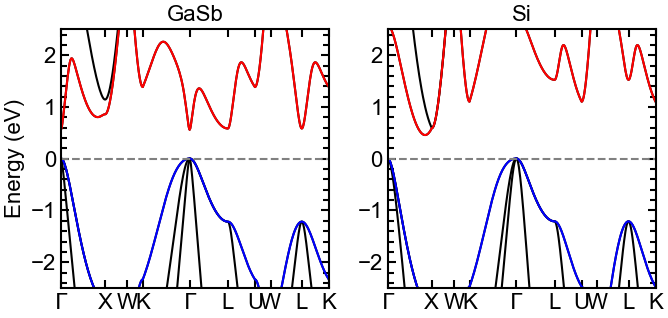

In [12]:
# plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,3.5) )

#--------------------#
# GaSb
#--------------------#
for i in range(BandGaSb.shape[1]):
    axes[0].plot(kDistGaSb, BandGaSb[:, i], color='black')
axes[0].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb], color='blue', lw=1.5)
axes[0].plot(kDistGaSb, BandGaSb[:, NumOccupiedGaSb+1], color='red', lw=1.5)
# X-axis
axes[0].set_xlim(kNodeGaSb[0], kNodeGaSb[-1])
axes[0].set_xticks(kNodeGaSb)
axes[0].set_xticklabels(labelGaSb)
axes[0].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axes[0].set_ylim(-2.5, 2.5)
axes[0].set_ylabel('Energy (eV)')
axes[0].set_title(r'GaSb', fontsize=16)

axes[0].axhline(0, color='gray', ls='--', lw=1.5)

#--------------------#
# Si
#--------------------#
for i in range(BandSi.shape[1]):
    axes[1].plot(kDistSi, BandSi[:, i], color='black')
axes[1].plot(kDistSi, BandSi[:, NumOccupiedGaSb], color='blue', lw=1.5)
axes[1].plot(kDistSi, BandSi[:, NumOccupiedGaSb+1], color='red', lw=1.5)
# X-axis
axes[1].set_xlim(kNodeSi[0], kNodeSi[-1])
axes[1].set_xticks(kNodeSi)
axes[1].set_xticklabels(labelSi)
axes[1].tick_params(axis='x', which='minor', bottom=False, top=False)
# Y-axis
axes[1].set_ylim(-2.5, 2.5)
axes[1].set_title(r'Si', fontsize=16)

axes[1].axhline(0, color='gray', ls='--', lw=1.5)

plt.tight_layout()

# save figure
fig.savefig('../../imag/GaSb-Si-bands.svg')

plt.show()